In [1]:
import json
import pathlib
import pandas as pd
import os

In [2]:
from lib.helpers import *
from lib.crypto import *
from lib.sentimentframe import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/will/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [4]:
dirty_hourly = pathlib.Path('../../../data/dirty/hourly/')
jsonl_files = os.listdir(dirty_hourly)

## Parse/Extract data for ALL Days/files in folder

`tilter_tweet_fields_as_dict` pulls specific fields/keys from a tweet, and returns them in a list of dicts

In [5]:
all_tweets = []

for file in jsonl_files:
    all_tweets.extend(filter_tweet_fields_as_dict(pathlib.Path(dirty_hourly,file)))

In [6]:
print(len(all_tweets))

204000


## Convert List of Dicts to a DataFrame

In [7]:
all_tweets_df = pd.DataFrame(all_tweets)

In [8]:
all_tweets_df.describe()

,id,user_favourites_count,user_followers_count,user_friends_count,user_id,quoted_quote_count,quoted_reply_count,quoted_retweet_count
count,2.040000e+05,2.040000e+05,2.040000e+05,204000.000000,2.040000e+05,12421.000000,12421.000000,12421.000000
mean,1.186981e+18,1.198763e+04,6.030132e+03,2338.735049,5.755950e+17,318.833588,637.422832,1191.190242
std,1.778519e+15,3.359382e+04,9.681044e+04,8945.693355,5.096184e+17,2598.010455,6653.674495,8505.617724
min,1.183905e+18,0.000000e+00,0.000000e+00,0.000000,1.200000e+01,1.000000,0.000000,0.000000
25%,1.185442e+18,1.630000e+02,9.300000e+01,151.000000,9.092315e+08,3.000000,4.000000,9.000000
50%,1.186982e+18,1.792000e+03,4.210000e+02,490.000000,8.574031e+17,10.000000,18.000000,53.000000
75%,1.188518e+18,9.395500e+03,1.821000e+03,1511.000000,1.047874e+18,55.000000,73.000000,255.000000
max,1.190056e+18,1.156485e+06,2.088005e+07,466478.000000,1.189962e+18,41058.000000,109446.000000,308702.000000


In [9]:
all_tweets_df.dtypes

created_at                 object
screen_name                object
full_text                  object
id                          int64
lang                       object
user_favourites_count       int64
user_followers_count        int64
user_friends_count          int64
user_location              object
user_profile_image_url     object
user_id                     int64
rt_status_screen_name      object
rt_status_id               object
mentions                   object
mention_ids                object
quoted_quote_count        float64
quoted_reply_count        float64
quoted_retweet_count      float64
dtype: object

## Show tweets that contain BTC & have been quoted more than 5 times

In [10]:
all_tweets_df[(all_tweets_df['full_text'].str.contains('BTC')) & (all_tweets_df['quoted_reply_count'] > 5)].head()

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,user_id,rt_status_screen_name,rt_status_id,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count
131,Tue Oct 29 11:54:26 +0000 2019,WidiaAgusSetia4,"Because #bitcoin decentralized,freedom ,able ...",1189148483464224769,en,4279,155,420,Worldwide,http://pbs.twimg.com/profile_images/1187659378...,1058628358978723840,NaN,NaN,[],[],98.0,301.0,296.0
163,Tue Oct 29 11:53:12 +0000 2019,WillemKadijk,"Bullish | Bitcoin, $9,400 | Starbucks acceptin...",1189148174168088576,en,19047,1208,1974,The Netherlands,http://pbs.twimg.com/profile_images/9709220640...,315783277,NaN,NaN,[rogerkver],[176758255],70.0,96.0,768.0
515,Sun Oct 20 06:58:16 +0000 2019,rhcguy,RT @ErikVoorhees: 1) Bitcoin is not deflationa...,1185812461758439424,en,78919,2071,5002,btc: 1AnmCr6fPvaaFCEZTeUGigwaU3Z2W19jBB,http://pbs.twimg.com/profile_images/9521640781...,944643651623313408,ErikVoorhees,61417559,[ErikVoorhees],[61417559],2.0,24.0,2.0
876,Sun Oct 20 06:40:12 +0000 2019,cryptosatoshi,@PeterSchiff Hahahahaha. Here is where you t...,1185807912096002048,en,1718,456,591,None,http://pbs.twimg.com/profile_images/8451654972...,2355335906,NaN,NaN,[PeterSchiff],[56562803],75.0,146.0,63.0
1146,Fri Oct 18 12:54:58 +0000 2019,roy_noom,Let them go with the flow on the waves 🌊🌊\n\nP...,1185177450474553344,en,23596,2108,410,🐳 The Water Is My Stadium 🐳,http://pbs.twimg.com/profile_images/9919278929...,963443347003146240,NaN,NaN,[],[],2.0,9.0,18.0


In [11]:
len(all_tweets_df)

204000

# Unique User ID's and Screen Names
    not 1:1

In [12]:
pd.DataFrame({'screen_name': [all_tweets_df['screen_name'].nunique()],
                 'user_id': [all_tweets_df['user_id'].nunique()]
             })

,screen_name,user_id
0,70319,70316


# Top 25 by Tweet

In [15]:
all_tweets_df.groupby(['screen_name'])['id','full_text'].count().sort_values(by="id", ascending=False).head(25)

,id,full_text
screen_name,,
SportsbookBTC,1471,1471
News_1jl4,1349,1349
bitcoinincoins,1153,1153
1jl4com,980,980
MoneyMasterX,701,701
crypto__mak,636,636
webnowcompany,631,631
newstwiteafrica,565,565
CoinCapsAi,519,519


# Top 25 by Retweets

In [16]:
all_tweets_df.groupby(['screen_name'])['id','rt_status_id'].count().sort_values(by="rt_status_id", ascending=False).head(25)

,id,rt_status_id
screen_name,,
daro3612,231,231
crypto__mak,636,205
satpal_satpal,191,191
rhcguy,196,189
SammarA12281909,173,173
amateurdev2,164,164
CryptoWolfONE,159,158
ganzocrypt,149,149
Hermetec,132,132


In [17]:
tweet_sentiment_df = process_df(all_tweets_df, tokenize=True, sentiment=True)

In [18]:
display("HEAD")
display(tweet_sentiment_df.head())
display("TAIL")
display(tweet_sentiment_df.tail())

'HEAD'

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,...,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count,clean_tokens,compound,negative,neutral,positive
0,Tue Oct 29 11:58:59 +0000 2019,luisgfagundes,RT @CCNMarkets: Starbucks Will Accept Bitcoin ...,1189149629977452544,en,4301,177,461,"Jacksonville Beach, FL",http://pbs.twimg.com/profile_images/9022587817...,...,[CCNMarkets],[1856523530],NaN,NaN,NaN,"[rt, ccnmarkets, starbucks, accept, bitcoin, t...",0.0,0.593,0.407,0.6705
1,Tue Oct 29 11:58:59 +0000 2019,thefinancialfor,"RT @thefinancialfor: Every year since 2015, #B...",1189149627469193216,en,199,1501,6,"Amsterdam, Holanda",http://pbs.twimg.com/profile_images/1045031709...,...,[thefinancialfor],[2557010554],NaN,NaN,NaN,"[rt, thefinancialfor, every, year, since, bitc...",0.0,0.505,0.495,0.8316
2,Tue Oct 29 11:58:57 +0000 2019,opp4wealth,RT @RedditBTC: This perfectly explains the cur...,1189149619713957888,en,2559,5846,6399,Lima / Peru,http://pbs.twimg.com/profile_images/1173000042...,...,[RedditBTC],[951006367],NaN,NaN,NaN,"[rt, redditbtc, perfectly, explains, current, ...",0.0,0.756,0.244,0.6369
3,Tue Oct 29 11:58:56 +0000 2019,Techtelegraph4,Russian Metals Plant to Start Bitcoin Mining h...,1189149616459190272,en,2,72,6,None,http://pbs.twimg.com/profile_images/1183377561...,...,[],[],NaN,NaN,NaN,"[russian, metal, plant, start, bitcoinmining, ...",0.0,1.000,0.000,0.0000
4,Tue Oct 29 11:58:52 +0000 2019,tiago60334177,RT @BitcollarDApp: 3 days to go in IEO phase o...,1189149599581265920,en,236,28,355,None,http://pbs.twimg.com/profile_images/1108826758...,...,[BitcollarDApp],[1140825020463104000],NaN,NaN,NaN,"[rt, bitcollardapp, day, go, ieo, phase, one, ...",0.0,1.000,0.000,0.0000


'TAIL'

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,...,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count,clean_tokens,compound,negative,neutral,positive
203995,Tue Oct 22 12:45:45 +0000 2019,babobowitz,RT @JacobCanfield: Trying to talk to my friend...,1186624683241689091,en,435,20,104,None,http://pbs.twimg.com/profile_images/1181409067...,...,[JacobCanfield],[933567617549455360],NaN,NaN,NaN,"[rt, jacobcanfield, trying, talk, friend, fami...",0.0,0.789,0.211,0.4939
203996,Tue Oct 22 12:45:40 +0000 2019,emilyia,RT @NiederNoah: Hey guys!\nLet's do a little q...,1186624660705828864,en,1,0,7,None,http://pbs.twimg.com/profile_images/5759807636...,...,[NiederNoah],[834875272616947714],NaN,NaN,NaN,"[rt, niedernoah, hey, guyslets, little, quicky...",0.0,0.839,0.161,0.3612
203997,Tue Oct 22 12:45:35 +0000 2019,kamivvs2,RT @100trillionUSD: #bitcoin .. like clockwork...,1186624643043606534,en,2098,153,520,None,http://pbs.twimg.com/profile_images/1175010973...,...,[100trillionUSD],[918804624303382528],NaN,NaN,NaN,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.0,0.667,0.333,0.3612
203998,Tue Oct 22 12:45:35 +0000 2019,kamivvs2,RT @100trillionUSD: #bitcoin .. like clockwork...,1186624643043606534,en,2098,153,520,None,http://pbs.twimg.com/profile_images/1175010973...,...,[100trillionUSD],[918804624303382528],NaN,NaN,NaN,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.0,0.667,0.333,0.3612
203999,Tue Oct 22 12:45:35 +0000 2019,blockalertz,Bitcoin IRA Is Letting Customers Lend Out Thei...,1186624642955522048,en,8,139,33,None,http://pbs.twimg.com/profile_images/6986857750...,...,[],[],NaN,NaN,NaN,"[bitcoin, ira, letting, customer, lend, crypto...",0.0,1.000,0.000,0.0000


In [19]:
unique_sentiment_df = tweet_sentiment_df[['created_at','full_text','screen_name','id']]

In [41]:
unique_sentiment_df.drop_duplicates(inplace=True,subset=['id'])
unique_sentiment_df.count()

/home/will/.conda/envs/proj2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


created_at     203017
full_text      203017
screen_name    203017
id             203017
dtype: int64

In [42]:
tweet_sentiment_df['created_at'] = pd.to_datetime(tweet_sentiment_df['created_at'])

In [43]:
# tweet_sentiment_df.resample()
# tweet_sentiment_df.groupby(created_at.dt.date).mean()
tweet_sentiment_df.resample('D', on='created_at').mean()

,id,user_favourites_count,user_followers_count,user_friends_count,user_id,quoted_quote_count,quoted_reply_count,quoted_retweet_count,compound,negative,neutral,positive
created_at,,,,,,,,,,,,
2019-10-15 00:00:00+00:00,1.184081e+18,10174.446917,5686.396000,2195.616583,5.924169e+17,220.907743,94.761120,545.154860,0.040549,0.829562,0.129890,0.171792
2019-10-16 00:00:00+00:00,1.184444e+18,16675.540000,6431.329417,2367.436917,5.772861e+17,225.297980,291.089899,1448.641414,0.060734,0.814602,0.124662,0.113537
2019-10-17 00:00:00+00:00,1.184807e+18,17172.854667,6355.415667,2614.327333,5.494405e+17,130.088710,230.320276,886.398618,0.066117,0.807959,0.125928,0.108956
2019-10-18 00:00:00+00:00,1.185169e+18,13504.941417,5567.078417,2613.003750,5.827658e+17,77.814324,113.461538,584.160477,0.060532,0.804007,0.135470,0.137741
2019-10-19 00:00:00+00:00,1.185531e+18,13156.336667,5388.656250,2356.901417,5.694968e+17,102.317010,229.927835,905.032216,0.064213,0.811604,0.124193,0.108704
2019-10-20 00:00:00+00:00,1.185893e+18,12022.886250,5418.388667,2562.498500,5.948594e+17,188.150538,321.026882,880.831541,0.052291,0.818520,0.129191,0.148977
2019-10-21 00:00:00+00:00,1.186256e+18,11371.018750,6700.968250,2498.956000,5.919911e+17,208.557836,107.203358,2020.910448,0.051705,0.826382,0.121913,0.135819
2019-10-22 00:00:00+00:00,1.186618e+18,10148.439500,5314.213917,2278.717417,5.983802e+17,128.972789,297.872109,758.228571,0.048729,0.817159,0.134113,0.163393
2019-10-23 00:00:00+00:00,1.186981e+18,10605.273000,7432.024083,2354.007583,5.760173e+17,104.750000,188.357735,532.975138,0.057383,0.810913,0.131709,0.144346


In [24]:
#tweet_sentiment_df.drop(columns=['id', 'retweet_count','compound'], inplace=True)

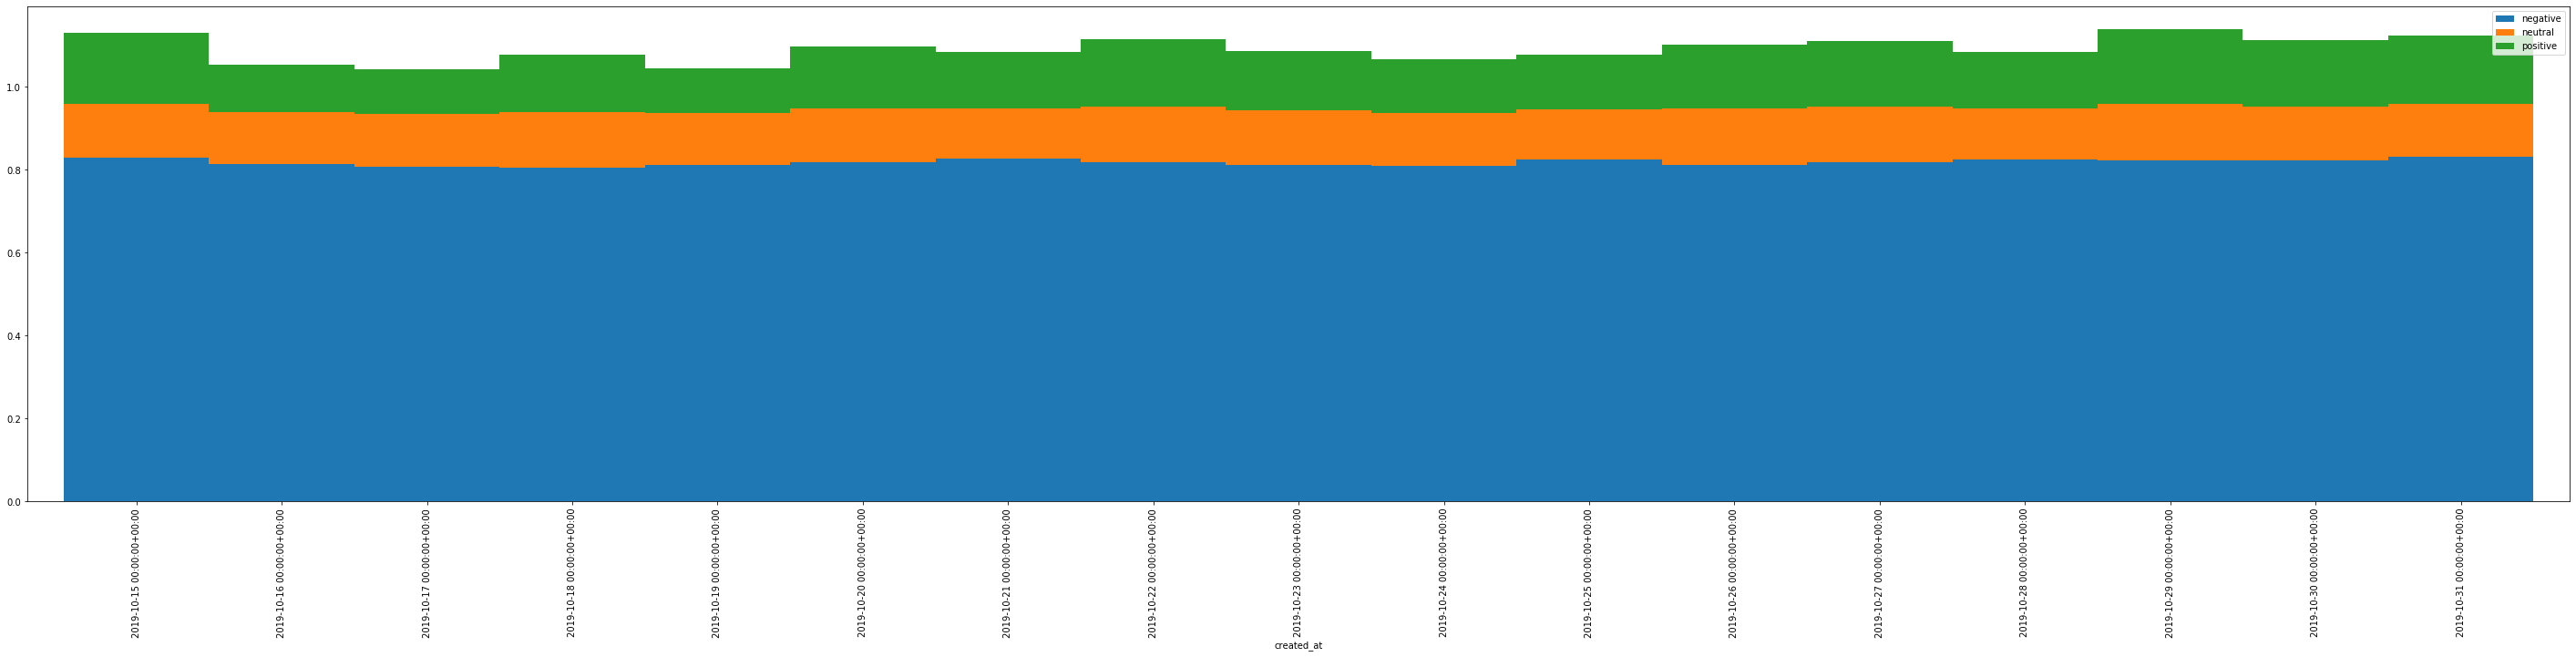

In [59]:
chart = tweet_sentiment_df[['created_at','negative','neutral','positive']]
chart_df = chart.resample('D', on='created_at').mean()
chart_df.plot(figsize=(50,10), kind='bar', stacked=True, width=1.0)

In [51]:
chart

,negative,neutral,positive
created_at,,,
2019-10-29 11:58:59+00:00,0.593,0.407,0.6705
2019-10-29 11:58:59+00:00,0.505,0.495,0.8316
2019-10-29 11:58:57+00:00,0.756,0.244,0.6369
2019-10-29 11:58:56+00:00,1.000,0.000,0.0000
2019-10-29 11:58:52+00:00,1.000,0.000,0.0000
...,...,...,...
2019-10-22 12:45:45+00:00,0.789,0.211,0.4939
2019-10-22 12:45:40+00:00,0.839,0.161,0.3612
2019-10-22 12:45:35+00:00,0.667,0.333,0.3612


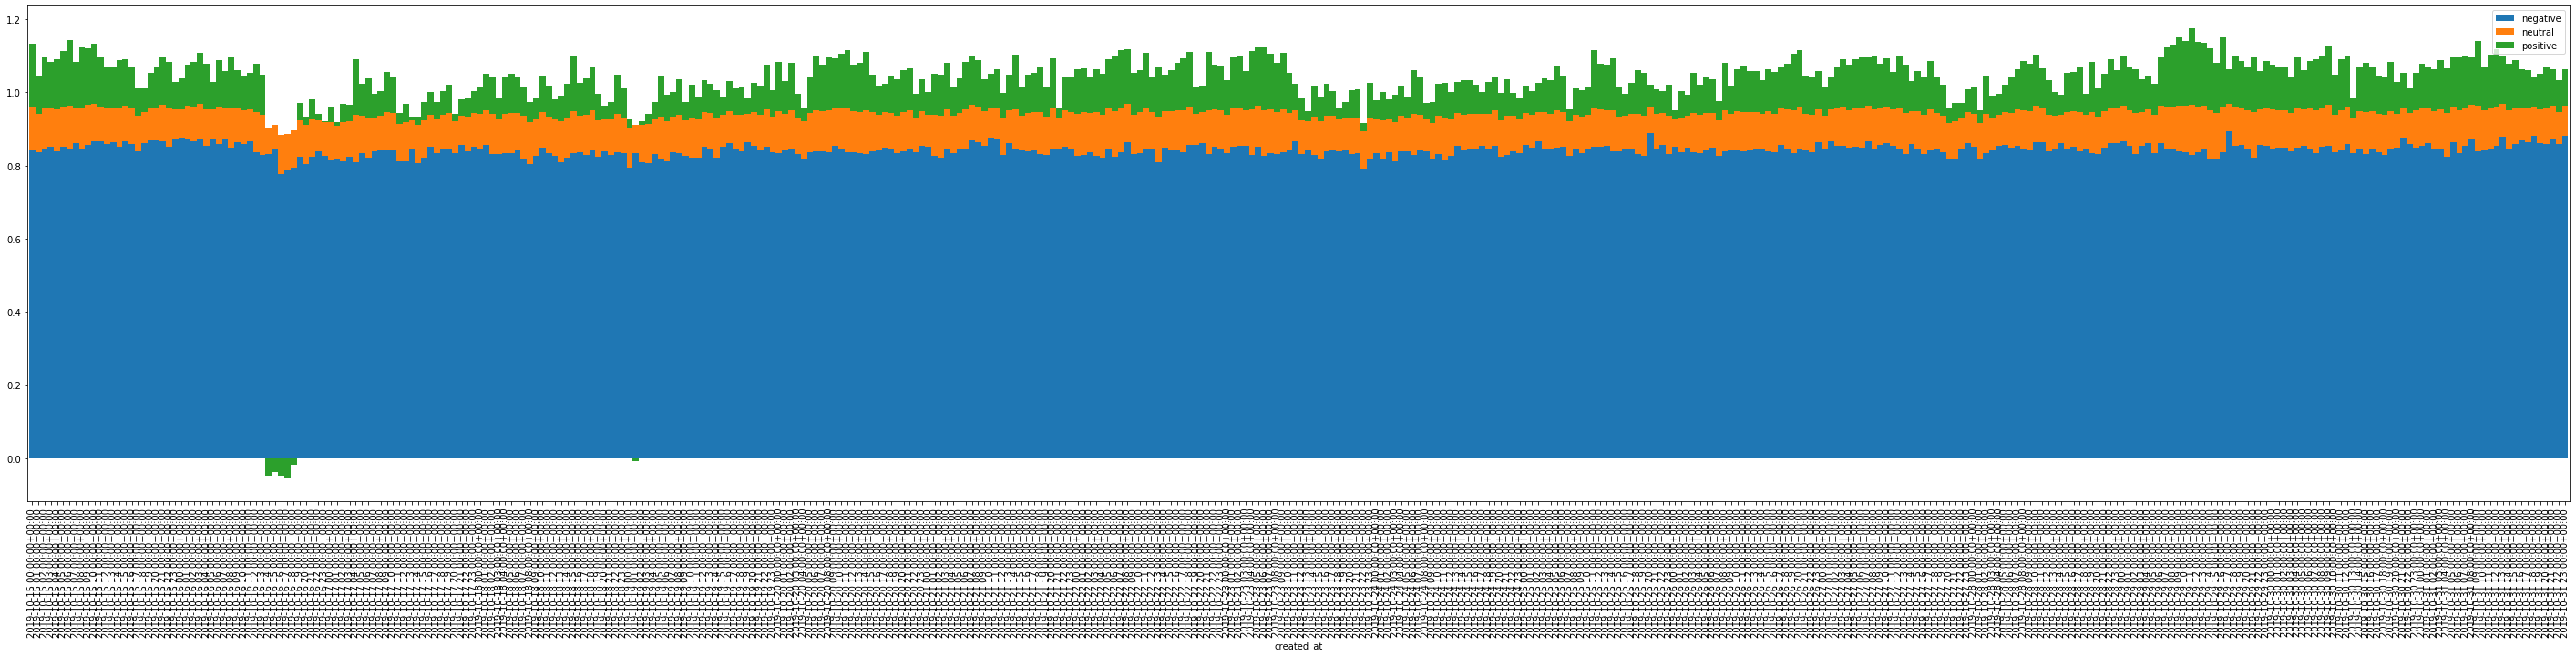

In [55]:
chart = tweet_sentiment_df[['created_at','negative','neutral','positive']]
chart[chart['neutral']<.4].resample('H', on='created_at').mean().plot(figsize=(50,10), kind='bar', stacked=True, width=1.0)

In [26]:
dirty_hourly_btc = pathlib.Path('../../../data/dirty/crypto/Coinbase_BTCUSD_1h.csv')
BTC_price = pd.read_csv(dirty_hourly_btc,header=1)
BTC_price.head()

,2019-11-13 03-AM,BTCUSD,8733.04,8743.91,8731.64,8743.88,26.75,233692.05
0,2019-11-13 02-AM,BTCUSD,8764.90,8764.90,8726.57,8733.04,233.40,2040299.62
1,2019-11-13 01-AM,BTCUSD,8779.99,8780.00,8758.45,8764.90,106.46,933208.20
2,2019-11-13 12-AM,BTCUSD,8810.00,8838.80,8758.39,8779.99,216.42,1902443.64
3,2019-11-12 11-PM,BTCUSD,8770.74,8810.00,8760.61,8810.00,203.20,1784356.95
4,2019-11-12 10-PM,BTCUSD,8762.48,8786.76,8747.10,8770.74,178.10,1560490.62


# Save Sentiment as Pickle File 





In [27]:
tweet_sentiment_df.to_pickle("./twitter_sentiment.pkl")